# Юрова Ю.А. М19-АЭ Вариант №24 (9)

## Лабораторная работа №2. Методы классификации данных

### Набор данных: 
#### 6 (occupancy)
### Классификаторы: 
#### 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов); 
#### 3 – линейный классификатор (персептрон).

### Задание: 
#### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
#### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
#### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
#### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
#### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
#### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
#### 7.	Заполните пропущенные значения в данных;
#### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
#### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


## Задание №1
### Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

#### 1. date time - Дата Время год-месяц-день час: минута: секунда
#### 2. Temperature - Температура, в градусах Цельсия
#### 3. Relative Humidity - Относительная влажность воздуха, %
#### 4. Light - Освещенность, Люкс
#### 5. CO2 - уровень углекислого газа CO2, пропромилле
#### 6. Humidity Ratio -  удельная влажность, производное количество от температуры и относительной влажности, в кг водяного пара/кг воздуха
#### 7. Occupancy - заполненность, 0 или 1: 0 для незанятого, 1 для занятого состояния


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

df_occupancy = pd.read_csv('datatest.txt')
data_occupancy = pd.DataFrame(df_occupancy)
data_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [2]:
data_occupancy.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

## Задание №2
### Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [3]:
print("Кол-во строк до удаления:", len(data_occupancy))
before_value = len(data_occupancy)
data_occupancy = data_occupancy.drop_duplicates()
print("Кол-во строк после удаления:", len(data_occupancy))
print("Удалено: ", before_value - len(data_occupancy) , "повторяющихся строк")

Кол-во строк до удаления: 2665
Кол-во строк после удаления: 2665
Удалено:  0 повторяющихся строк


## Задание №3
### Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:>

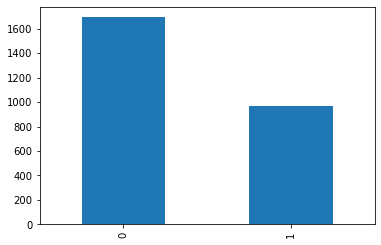

In [4]:
data_occupancy['Occupancy'].value_counts().plot.bar()

#### Из гистограммы можно сделать вывод, что классы не сбалансированы. Наблюдается сильное преодладание первого класса (0).

## Задание №4
### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

<AxesSubplot:>

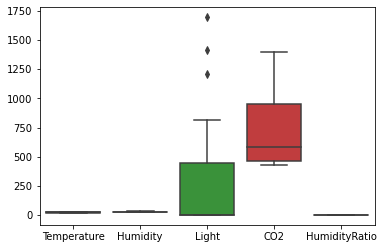

In [5]:
sns.boxplot(data = data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

#### Нормализация

<AxesSubplot:>

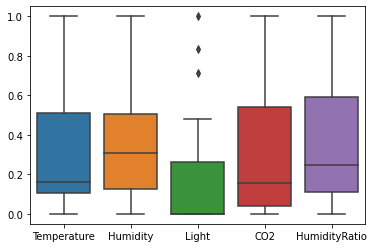

In [8]:
scaler = preprocessing.MinMaxScaler()
data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']] = scaler.fit_transform(data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].values.astype(float))
sns.boxplot(data=data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

## Задание №5
### Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [9]:
data_occupancy['date'].describe()

count                    2665
unique                   2665
top       2015-02-03 15:59:00
freq                        1
Name: date, dtype: object

#### Каждый из категориальных признаков уникален, поэтому замена не требуется.

## Задание №6
### Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

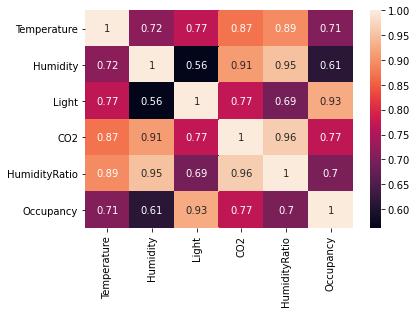

In [10]:
aCorr = data_occupancy.corr()
sns.heatmap(aCorr, annot = True)

#### Корреляция признаков равномерна.

## Задание №7
### Заполните пропущенные значения в данных

In [11]:
null_data = data_occupancy.isnull()
null_data.sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

#### Пропущенных значений нет

## Задание №8
### Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

### Классификаторы: 
#### 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов); 
#### 3 – линейный классификатор (персептрон).

### Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)

In [17]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
X = data_occupancy.drop(('date'), axis=1)
Y = data_occupancy.Occupancy
X.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [19]:
radius_classif = RadiusNeighborsClassifier()
radius_classif.get_params()
params = {'radius': [2, 3, 4],
          'weights': ['uniform', 'distance']}
radius_classif_grid = GridSearchCV(radius_classif, params)
radius_classif_grid.fit(x_train, y_train)

GridSearchCV(estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': [2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [20]:
#r = radius_classif_grid.best_estimator_.radius_neighbors
radius_classif = RadiusNeighborsClassifier(4)
radius_classif.fit(x_train, y_train)

rad_classif_predict = radius_classif.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, rad_classif_predict ))
print('Best: ',  radius_classif_grid.best_score_)

Accuracy:  0.645
Best:  0.9989276139410187


### Линейный классификатор (персептрон)

In [31]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={'alpha': np.linspace(0, 1, 20)[1:],'max_iter': [x for x in range(1, 50)],}, n_jobs=-1)
search.fit(x_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(x_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

best: 1.0 alpha: 0.05263157894736842 max_iter: 1
Accuracy ppn: 1.00000
